# `20180620a` - Testing pulser and ADC

In [1]:
# Basic math
import math
import os
# Signal processing
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
# Custom lib
import ustk as USTk # Ultrasound toolkit

## Preparing the data

Let's unpack what has been acquired by the ADC pHAT.

20180620a.DAT
20180620a.DAT


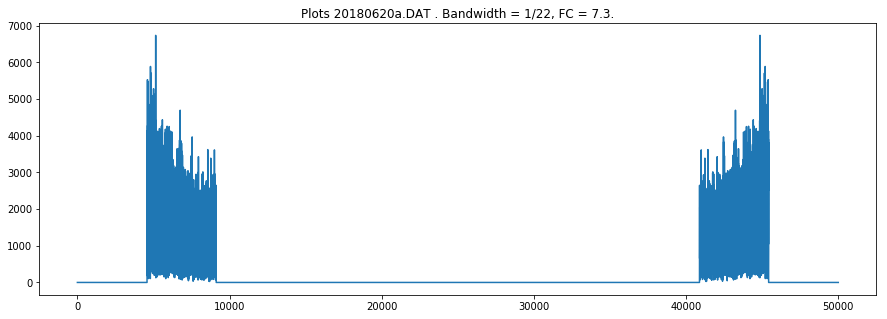

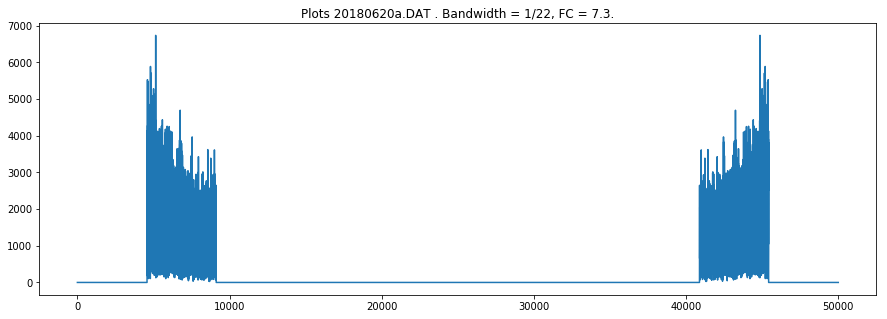

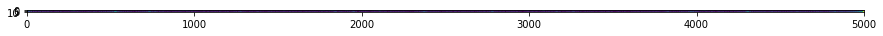

In [4]:
for filename in os.listdir("./data/"):
    if filename.endswith(".DAT"):
        DATFile = os.path.join("", filename).split(".")[0]
        if not os.path.isfile(DATFile+".npz"):
            print DATFile+".DAT"
            Arf = USTk.CreateUsPack(DATFile+".DAT") 

## Working on a specific file

In [12]:
FullLength = len(rawSignal)
print "There are ",FullLength/5000,"lines in the file of 5000 pts."

There are  10 lines in the file of 5000 pts.


In [6]:
DATFile = "20180620a"
DATA = np.load(DATFile+".npz") 
DATA.keys()
Image, rawSignal = DATA['arr_1'], DATA['arr_0']

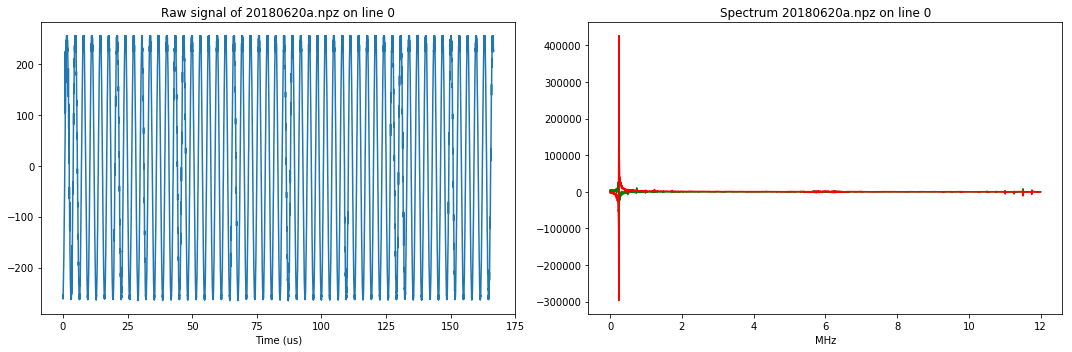

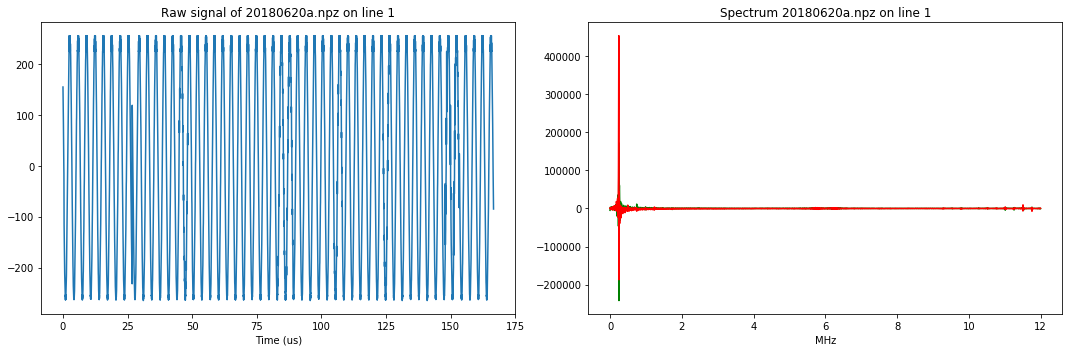

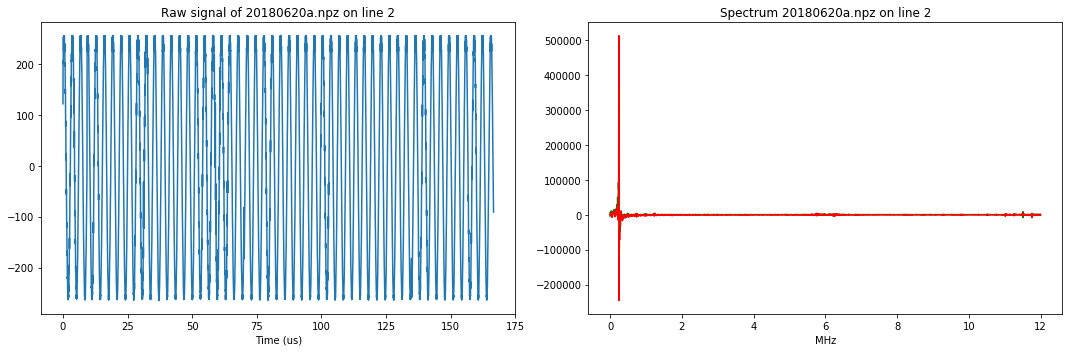

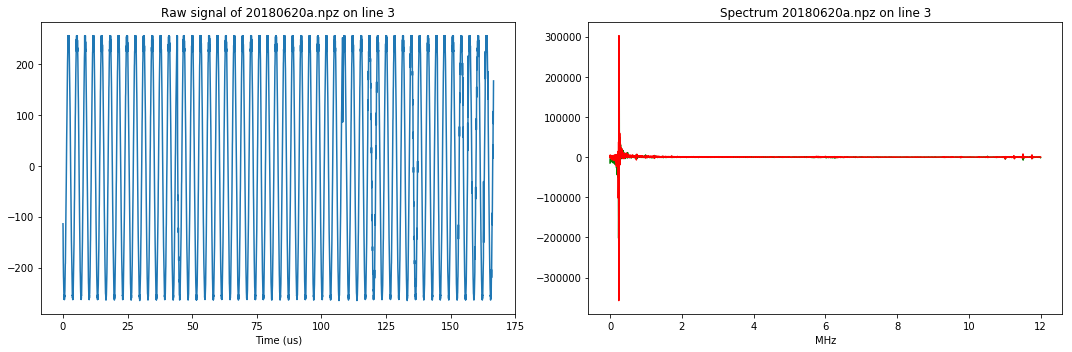

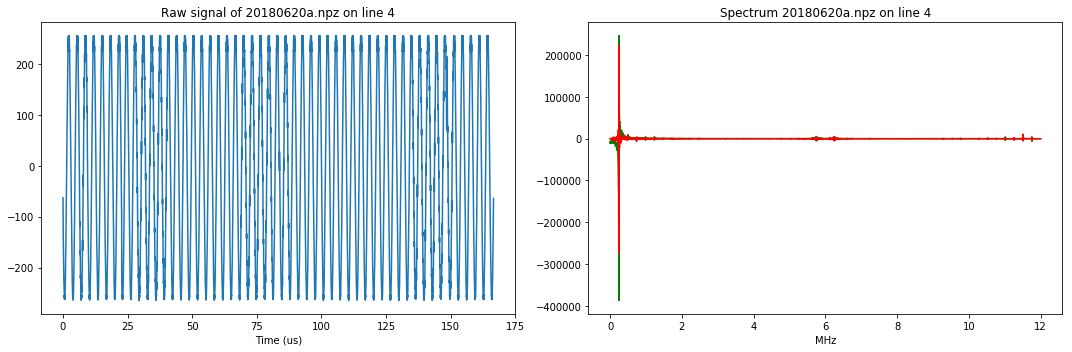

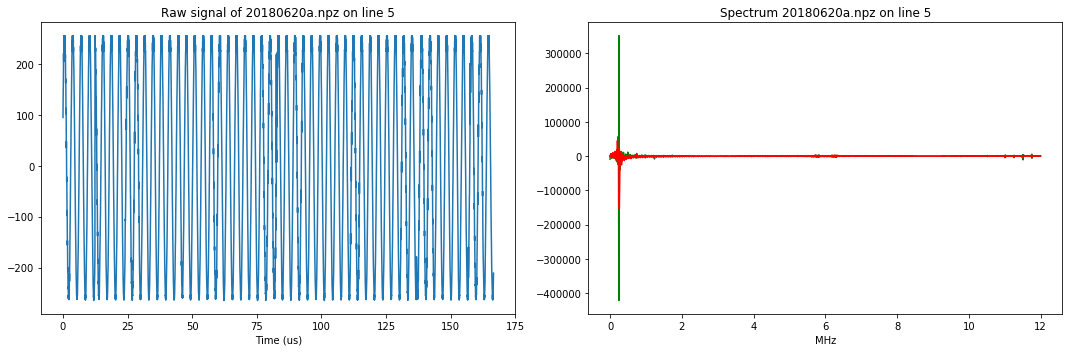

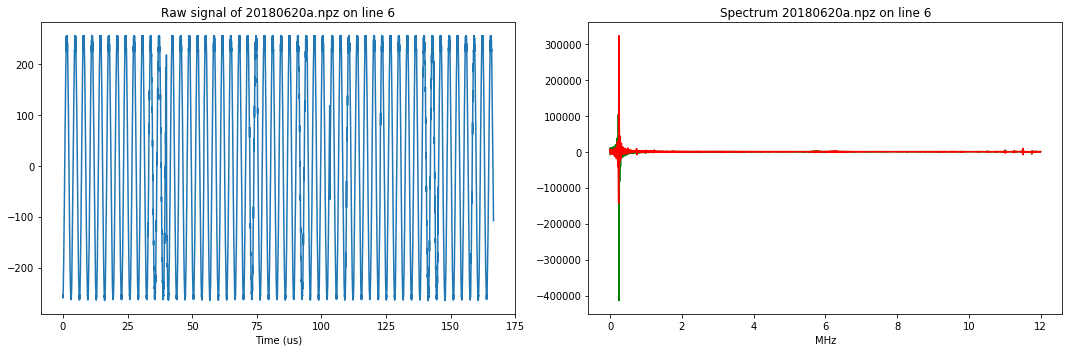

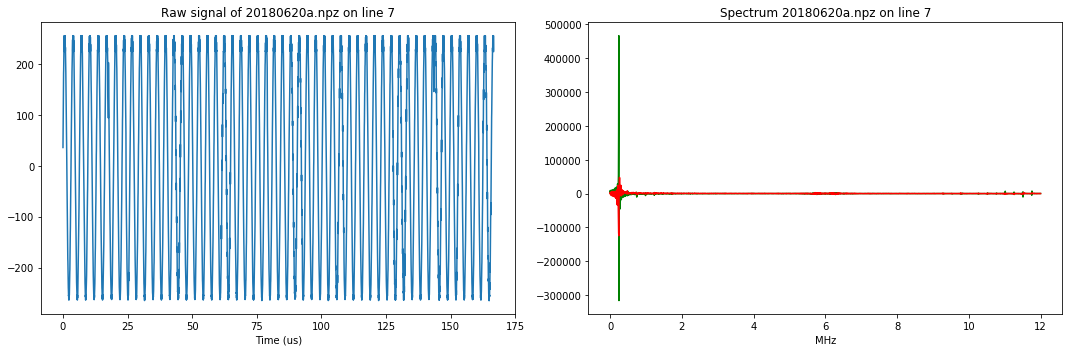

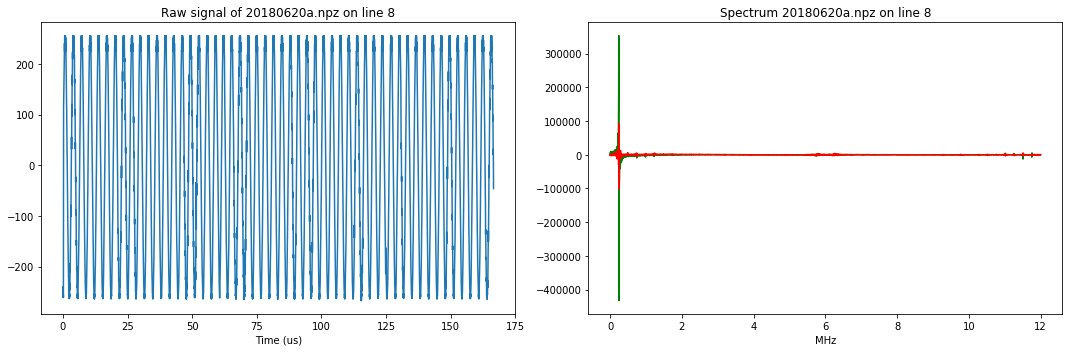

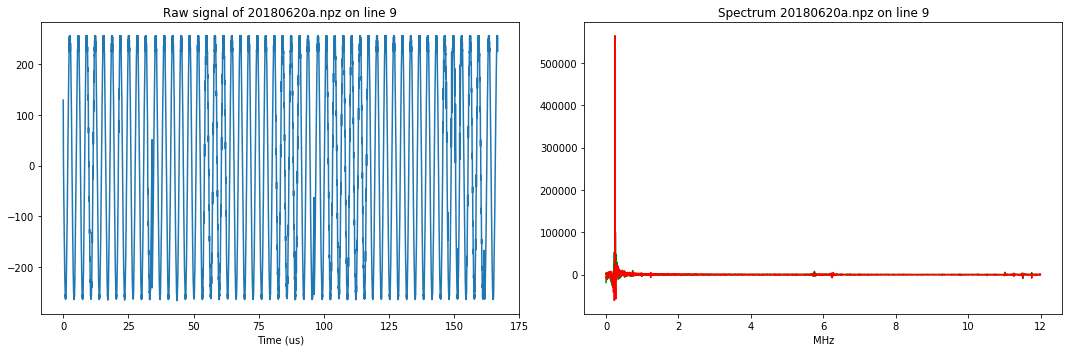

ValueError: Invalid number of FFT data points (0) specified.

In [13]:
for N in range(FullLength):
    plt.figure(figsize=(15,5))
    line = rawSignal[N*5000:(N+1)*5000]
    F = 12 # acquisition speed in MHz
    plt.subplot(1, 2, 1)
    plt.title("Raw signal of "+DATFile+".npz on line "+str(N))
    ff = [ 2*x*1000.0/(F*len(line)) for x in range(len(line))]

    plt.plot(ff,line)
    plt.xlabel("Time (us)")

    plt.subplot(1, 2, 2)
    plt.title("Spectrum "+DATFile+".npz on line "+str(N))
    fftline = np.fft.fft(line)
    ff = [ 12*2.0*x/(len(line)) for x in range(len(line))]
    plt.plot(ff[0:len(line)/2],np.real(fftline)[0:len(line)/2],"g")
    plt.plot(ff[0:len(line)/2],np.imag(fftline)[0:len(line)/2],"r")
    plt.xlabel("MHz")

    plt.tight_layout()
    plt.savefig("lines/"+DATFile+"_line"+str(N)+"sample.jpg", bbox_inches='tight')
    plt.show()

## Doing line 0

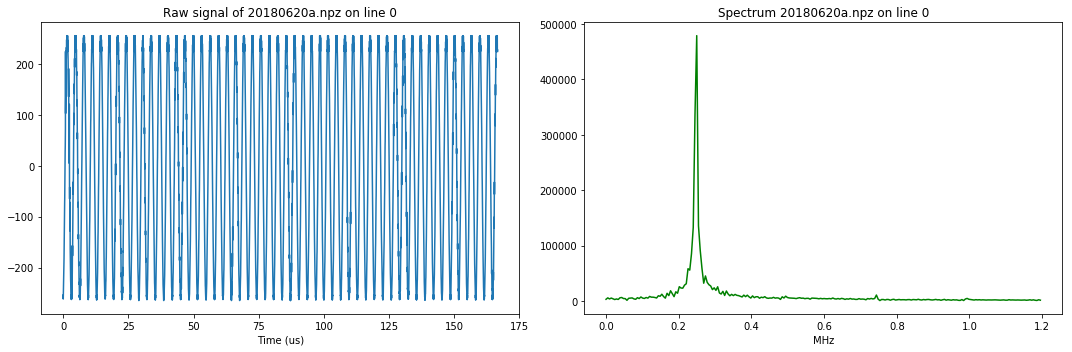

In [18]:
N = 0
line = rawSignal[N*5000:(N+1)*5000]
F = 12 # acquisition speed in MHz
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Raw signal of "+DATFile+".npz on line "+str(N))
ff = [ 2*x*1000.0/(F*len(line)) for x in range(len(line))]

plt.plot(ff,line)
plt.xlabel("Time (us)")

plt.subplot(1, 2, 2)
plt.title("Spectrum "+DATFile+".npz on line "+str(N))
fftline = np.fft.fft(line)
ff = [ 12*2.0*x/(len(line)) for x in range(len(line))]
plt.plot(ff[0:len(line)/20],np.abs(fftline)[0:len(line)/20],"g")
#plt.plot(ff[0:len(line)/20],np.imag(fftline)[0:len(line)/20],"r")
plt.xlabel("MHz")

plt.tight_layout()
plt.savefig("lines/"+DATFile+"_line"+str(N)+"details.jpg", bbox_inches='tight')
plt.show()